In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 516.2MB 24kB/s 


In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, MaxPool2D, Conv2D, Dropout, BatchNormalization, ZeroPadding2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
!git clone https://github.com/laxmimerit/dog-cat-full-dataset.git

Cloning into 'dog-cat-full-dataset'...
remote: Enumerating objects: 25027, done.
remote: Total 25027 (delta 0), reused 0 (delta 0), pack-reused 25027
Receiving objects: 100% (25027/25027), 541.62 MiB | 35.56 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Checking out files: 100% (25001/25001), done.


In [0]:
train_data_dir='/content/dog-cat-full-dataset/data/train'
test_data_dir='/content/dog-cat-full-dataset/data/test'

In [0]:
img_width=32
img_height=32
batch_size=20

In [0]:
datagen=ImageDataGenerator(rescale=1./255)

In [8]:
train_generator=datagen.flow_from_directory(directory=train_data_dir,target_size=(32,32),classes=['dogs','cats'],
                                            class_mode='binary',batch_size=batch_size)

Found 20000 images belonging to 2 classes.


In [9]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [11]:
test_generator=datagen.flow_from_directory(directory=test_data_dir,target_size=(32,32),classes=['dogs','cats'],
                                           class_mode='binary',batch_size=batch_size)

Found 5000 images belonging to 2 classes.


In [12]:
len(train_generator)

1000

## Build CNN Base Model

In [0]:
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform',input_shape=(img_width,img_height,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(units=128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(units=1,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2097280   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,099,201
Trainable params: 2,099,201
Non-trainable params: 0
_________________________________________________________________


In [0]:
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history=model.fit_generator(generator=train_generator,steps_per_epoch=len(train_generator),epochs=5,
                    validation_data=test_generator,validation_steps=len(test_generator),verbose=1)

Epoch 1/5
1000/1000 [==============================] - 100s 100ms/step - loss: 0.4254 - accuracy: 0.7992 - val_loss: 0.5334 - val_accuracy: 0.7362
Epoch 2/5
1000/1000 [==============================] - 99s 99ms/step - loss: 0.3747 - accuracy: 0.8324 - val_loss: 0.5350 - val_accuracy: 0.7466
Epoch 3/5
1000/1000 [==============================] - 102s 102ms/step - loss: 0.3273 - accuracy: 0.8574 - val_loss: 0.5786 - val_accuracy: 0.7500
Epoch 4/5
1000/1000 [==============================] - 102s 102ms/step - loss: 0.2651 - accuracy: 0.8886 - val_loss: 0.6429 - val_accuracy: 0.7368
Epoch 5/5
1000/1000 [==============================] - 104s 104ms/step - loss: 0.2183 - accuracy: 0.9078 - val_loss: 0.7284 - val_accuracy: 0.7380


In [18]:
history.history

{'accuracy': [0.7991999983787537,
  0.8324000239372253,
  0.8574000000953674,
  0.8885999917984009,
  0.907800018787384],
 'loss': [0.4254075586795807,
  0.374714732170105,
  0.327332079410553,
  0.26509585976600647,
  0.21825261414051056],
 'val_accuracy': [0.7361999750137329,
  0.7465999722480774,
  0.75,
  0.7368000149726868,
  0.7379999756813049],
 'val_loss': [0.533354640007019,
  0.5349594950675964,
  0.5785642862319946,
  0.6429215669631958,
  0.7283563017845154]}

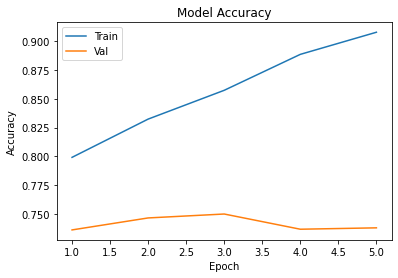

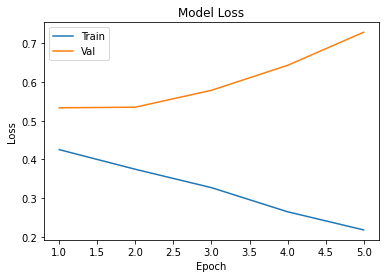

In [20]:
epoch_range=range(1,6)
plt.plot(epoch_range,history.history['accuracy'])
plt.plot(epoch_range,history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Val'])
plt.show()

plt.plot(epoch_range,history.history['loss'])
plt.plot(epoch_range,history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Val'])
plt.show()

## 3 Blocks of VGG

In [0]:
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',input_shape=(img_width,img_height,3),
                 activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

In [0]:
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
history=model.fit_generator(generator=train_generator,steps_per_epoch=len(train_generator),verbose=1,
                    validation_data =test_generator,validation_steps=len(test_generator),epochs=5)

Epoch 1/5
1000/1000 [==============================] - 203s 203ms/step - loss: 0.3405 - accuracy: 0.8504 - val_loss: 0.4534 - val_accuracy: 0.7914
Epoch 2/5
1000/1000 [==============================] - 201s 201ms/step - loss: 0.2980 - accuracy: 0.8712 - val_loss: 0.4717 - val_accuracy: 0.7948
Epoch 3/5
1000/1000 [==============================] - 203s 203ms/step - loss: 0.2528 - accuracy: 0.8931 - val_loss: 0.4870 - val_accuracy: 0.7938
Epoch 4/5
1000/1000 [==============================] - 207s 207ms/step - loss: 0.2091 - accuracy: 0.9137 - val_loss: 0.5143 - val_accuracy: 0.7940
Epoch 5/5
1000/1000 [==============================] - 208s 208ms/step - loss: 0.1862 - accuracy: 0.9220 - val_loss: 0.6184 - val_accuracy: 0.7892


In [28]:
history.history

{'accuracy': [0.8504499793052673,
  0.871150016784668,
  0.8931499719619751,
  0.9137499928474426,
  0.921999990940094],
 'loss': [0.34048959612846375,
  0.29796817898750305,
  0.2527891993522644,
  0.20905844867229462,
  0.18615466356277466],
 'val_accuracy': [0.7914000153541565,
  0.7947999835014343,
  0.7937999963760376,
  0.7940000295639038,
  0.7892000079154968],
 'val_loss': [0.4534417390823364,
  0.4716930687427521,
  0.4869616627693176,
  0.5142925977706909,
  0.6184132099151611]}

## Dropout and Batch Normalization

In [0]:
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',input_shape=(img_width,img_height,3),
                 activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 128)        

In [0]:
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
history=model.fit_generator(generator=train_generator,steps_per_epoch=len(train_generator),verbose=1,
                    validation_data =test_generator,validation_steps=len(test_generator),epochs=10)

Epoch 1/10
1000/1000 [==============================] - 230s 230ms/step - loss: 0.6754 - accuracy: 0.6296 - val_loss: 0.6230 - val_accuracy: 0.6598
Epoch 2/10
1000/1000 [==============================] - 232s 232ms/step - loss: 0.6094 - accuracy: 0.6810 - val_loss: 0.6613 - val_accuracy: 0.6342
Epoch 3/10
1000/1000 [==============================] - 230s 230ms/step - loss: 0.5617 - accuracy: 0.7135 - val_loss: 0.7212 - val_accuracy: 0.5758
Epoch 4/10
1000/1000 [==============================] - 232s 232ms/step - loss: 0.5312 - accuracy: 0.7342 - val_loss: 0.5277 - val_accuracy: 0.7490
Epoch 5/10
1000/1000 [==============================] - 233s 233ms/step - loss: 0.5041 - accuracy: 0.7560 - val_loss: 0.5106 - val_accuracy: 0.7420
Epoch 6/10
1000/1000 [==============================] - 237s 237ms/step - loss: 0.4860 - accuracy: 0.7642 - val_loss: 0.4999 - val_accuracy: 0.7502
Epoch 7/10
1000/1000 [==============================] - 235s 235ms/step - loss: 0.4682 - accuracy: 0.7805 - val_

In [33]:
history.history

{'accuracy': [0.6296499967575073,
  0.6809999942779541,
  0.7135499715805054,
  0.7342000007629395,
  0.7559999823570251,
  0.7641500234603882,
  0.7804999947547913,
  0.7878999710083008,
  0.7951499819755554,
  0.8055999875068665],
 'loss': [0.6754257678985596,
  0.60938960313797,
  0.5617145895957947,
  0.5311693549156189,
  0.5041406750679016,
  0.48598432540893555,
  0.46824145317077637,
  0.44991815090179443,
  0.43898773193359375,
  0.42961665987968445],
 'val_accuracy': [0.6597999930381775,
  0.6341999769210815,
  0.5758000016212463,
  0.7490000128746033,
  0.7419999837875366,
  0.7501999735832214,
  0.7540000081062317,
  0.7878000140190125,
  0.8062000274658203,
  0.8126000165939331],
 'val_loss': [0.6230219006538391,
  0.6613117456436157,
  0.721244215965271,
  0.5276873707771301,
  0.5105940103530884,
  0.49987733364105225,
  0.5289745330810547,
  0.4628019630908966,
  0.41553160548210144,
  0.4044341444969177]}

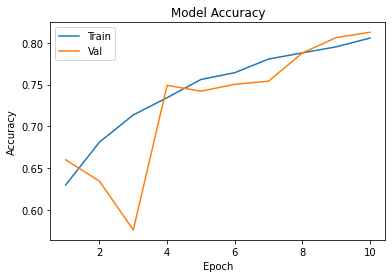

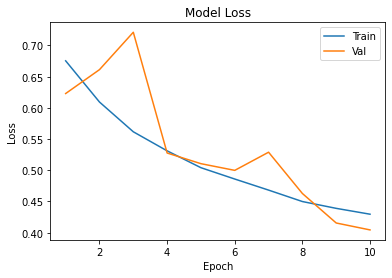

In [34]:
epoch_range=range(1,11)
plt.plot(epoch_range,history.history['accuracy'])
plt.plot(epoch_range,history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['Train','Val'])
plt.show()

plt.plot(epoch_range,history.history['loss'])
plt.plot(epoch_range,history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(['Train','Val'])
plt.show()